### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import pathlib

from sklearn.metrics import f1_score
from joblib import load

import sys
sys.path.append("../utils")
from split_utils import get_features_data
from train_utils import get_dataset
from evaluate_utils import evaluate_model_cm, evaluate_model_score

### Load necessary data

In [2]:
# specify results directory
results_dir = pathlib.Path("evaluations/")
results_dir.mkdir(parents=True, exist_ok=True)

# load features data from indexes and features dataframe
data_split_path = pathlib.Path("../1.split_data/indexes/data_split_indexes.tsv")
data_split_indexes = pd.read_csv(data_split_path, sep="\t", index_col=0)
features_dataframe_path = pathlib.Path("../0.download_data/data/training_data.csv.gz")
features_dataframe = get_features_data(features_dataframe_path)

### Evaluate best model

In [3]:
model_dir = pathlib.Path("../2.train_model/models/")
log_reg_model_path = pathlib.Path(f"{model_dir}/log_reg_model.joblib")
log_reg_model = load(log_reg_model_path)

### Evaluate with training data

In [4]:
training_data = get_dataset(features_dataframe, data_split_indexes, "train")
training_data

,Mitocheck_Phenotypic_Class,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Frame,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,Metadata_Gene,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
0,MetaphaseAlignment,572.214286,58.185714,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,ch-TOG,...,1.048350,-0.721622,0.749788,-1.377590,0.454974,0.188488,0.141427,-1.553405,2.346107,-1.774278
1,Artefact,1117.070423,342.732394,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,ch-TOG,...,1.172767,-0.290257,-0.709041,-1.431541,-0.063308,-0.412793,0.452684,-1.906647,1.962141,-0.223039
2,Artefact,1116.500000,362.000000,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,ch-TOG,...,1.093582,-0.323180,-0.663069,-1.427502,-0.901764,-0.355080,0.418053,-2.298449,1.098266,-0.069326
3,Artefact,1106.348485,370.469697,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,ch-TOG,...,0.943948,-0.211267,-0.346355,-1.365543,-0.276932,0.023856,0.376514,-1.700348,1.833686,-0.625385
4,MetaphaseAlignment,937.692308,521.048077,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,ch-TOG,...,0.947300,-0.564136,0.333336,-1.584454,0.891666,1.223252,-0.359166,-0.826366,2.115734,-1.241848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5515,OutOfFocus,411.508929,361.410714,LT0601_01,217,49,1,LT0601_01_217,LT0601_01/LT0601_01_217_49.tif,ABCB8,...,-0.724141,4.936666,2.227179,-1.458934,-0.774605,-1.679045,-2.429998,-0.826404,0.730059,1.286466
5516,OutOfFocus,808.740741,536.296296,LT0601_01,217,49,1,LT0601_01_217,LT0601_01/LT0601_01_217_49.tif,ABCB8,...,-1.463249,4.504158,4.272579,-1.529108,-0.932259,-0.898132,-3.123627,-0.719680,-0.425281,1.687259
5518,OutOfFocus,383.075269,220.198925,LT0601_01,217,49,1,LT0601_01_217,LT0601_01/LT0601_01_217_49.tif,ABCB8,...,0.525202,8.110262,1.777901,-1.512628,-0.225867,-1.612982,-0.679415,-2.581475,0.501395,1.981009
5520,OutOfFocus,898.614815,302.407407,LT0603_03,2,49,1,LT0603_03_2,LT0603_03/LT0603_03_2_49.tif,failed QC,...,0.553313,10.086836,1.170072,-1.317000,-0.994644,-1.406541,-0.104613,-0.056216,0.714624,1.612470


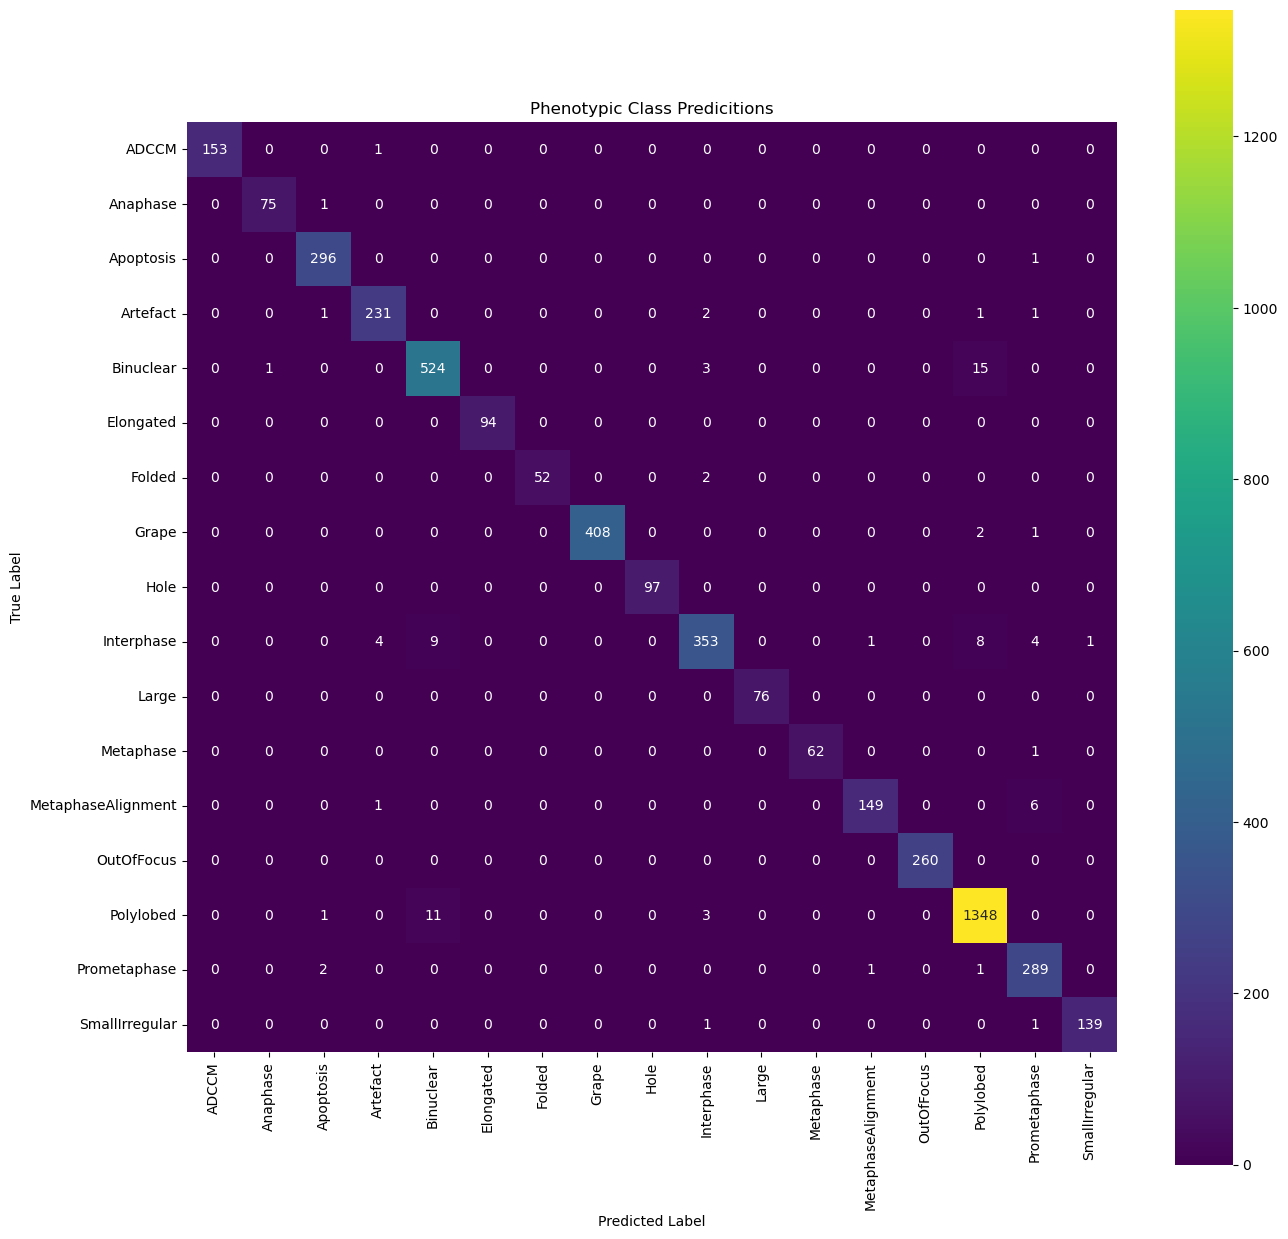

In [5]:
y_train, y_train_pred = evaluate_model_cm(log_reg_model, training_data)

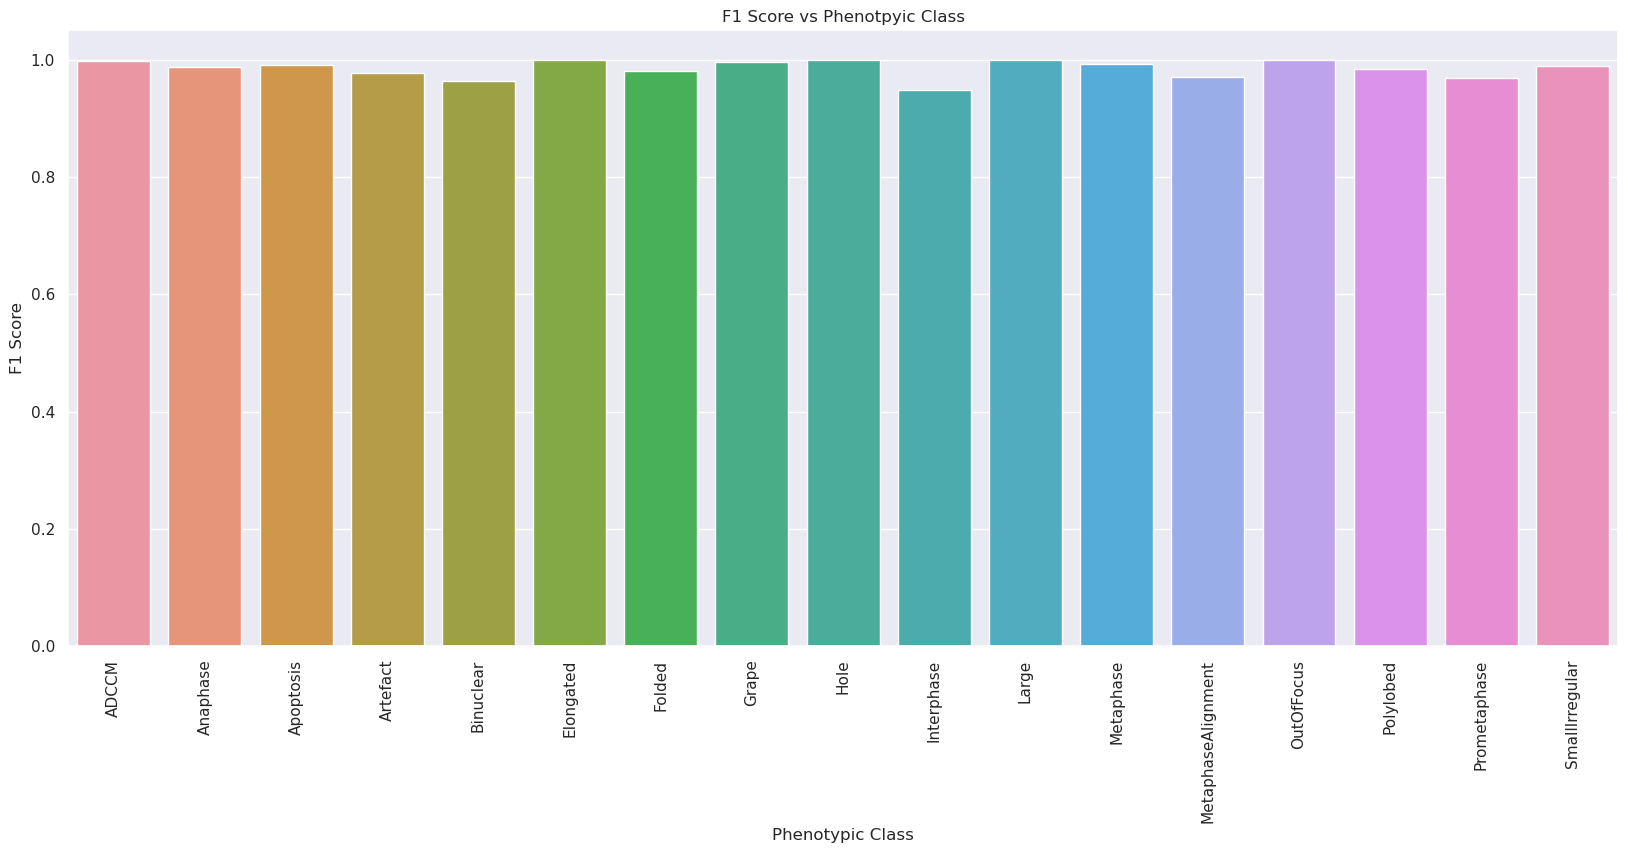

In [6]:
evaluate_model_score(log_reg_model, training_data)

### Evaluate with testing data

In [7]:
testing_data = get_dataset(features_dataframe, data_split_indexes, "test")
testing_data

,Mitocheck_Phenotypic_Class,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Frame,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,Metadata_Gene,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
1825,ADCCM,547.031579,198.326316,LT0090_33,383,72,1,LT0090_33_383,LT0090_33/LT0090_33_383_72.tif,negative control,...,0.205896,-0.311293,-0.278451,-0.946546,-0.340490,0.008571,-1.057863,-0.532144,-0.281705,0.971590
1114,ADCCM,637.014286,276.028571,LT0042_10,44,28,1,LT0042_10_44,LT0042_10/LT0042_10_44_28.tif,CGI-63,...,1.490947,0.630154,1.296323,-1.350022,-1.383894,-0.620152,0.595732,-0.187641,2.106002,-0.427294
1798,ADCCM,490.172840,345.283951,LT0090_33,383,84,1,LT0090_33_383,LT0090_33/LT0090_33_383_84.tif,negative control,...,0.007967,-0.712226,-0.428250,-1.280055,0.825712,2.978525,0.682767,-1.933716,-0.478942,-0.244885
4607,ADCCM,167.458333,219.187500,LT0030_17,184,39,1,LT0030_17_184,LT0030_17/LT0030_17_184_39.tif,RGR,...,1.220822,1.023886,-0.294915,-0.712583,-0.028849,1.380579,-0.058686,0.330604,0.143440,1.379452
4557,ADCCM,216.406593,663.571429,LT0030_17,184,87,1,LT0030_17_184,LT0030_17/LT0030_17_184_87.tif,RGR,...,0.150011,0.615567,-0.172079,-1.308969,0.019160,-0.153897,-1.068657,-1.181041,-0.489656,1.165644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,SmallIrregular,475.046875,908.640625,LT0014_12,159,77,1,LT0014_12_159,LT0014_12/LT0014_12_159_77.tif,TFR2,...,1.030708,-0.006476,0.333852,-0.696902,-0.669108,1.757730,0.155874,0.795165,1.823297,-1.463432
4922,SmallIrregular,670.516129,528.129032,LT0015_22,69,62,1,LT0015_22_69,LT0015_22/LT0015_22_69_62.tif,ITGAV,...,1.497556,2.656320,-0.077555,-0.866459,0.632432,0.981223,0.893966,-0.979759,1.699149,1.036175
633,SmallIrregular,1016.586957,531.478261,LT0094_01,319,85,1,LT0094_01_319,LT0094_01/LT0094_01_319_85.tif,ENSG00000177426,...,-0.502833,0.037225,-0.391803,-1.499683,1.122711,4.786983,-0.566482,0.940468,0.624690,0.022921
4925,SmallIrregular,554.764706,134.485294,LT0015_22,69,62,1,LT0015_22_69,LT0015_22/LT0015_22_69_62.tif,ITGAV,...,1.460440,2.974402,2.803142,-1.293450,-0.400513,0.890687,0.487757,-0.978177,2.102062,-0.457844


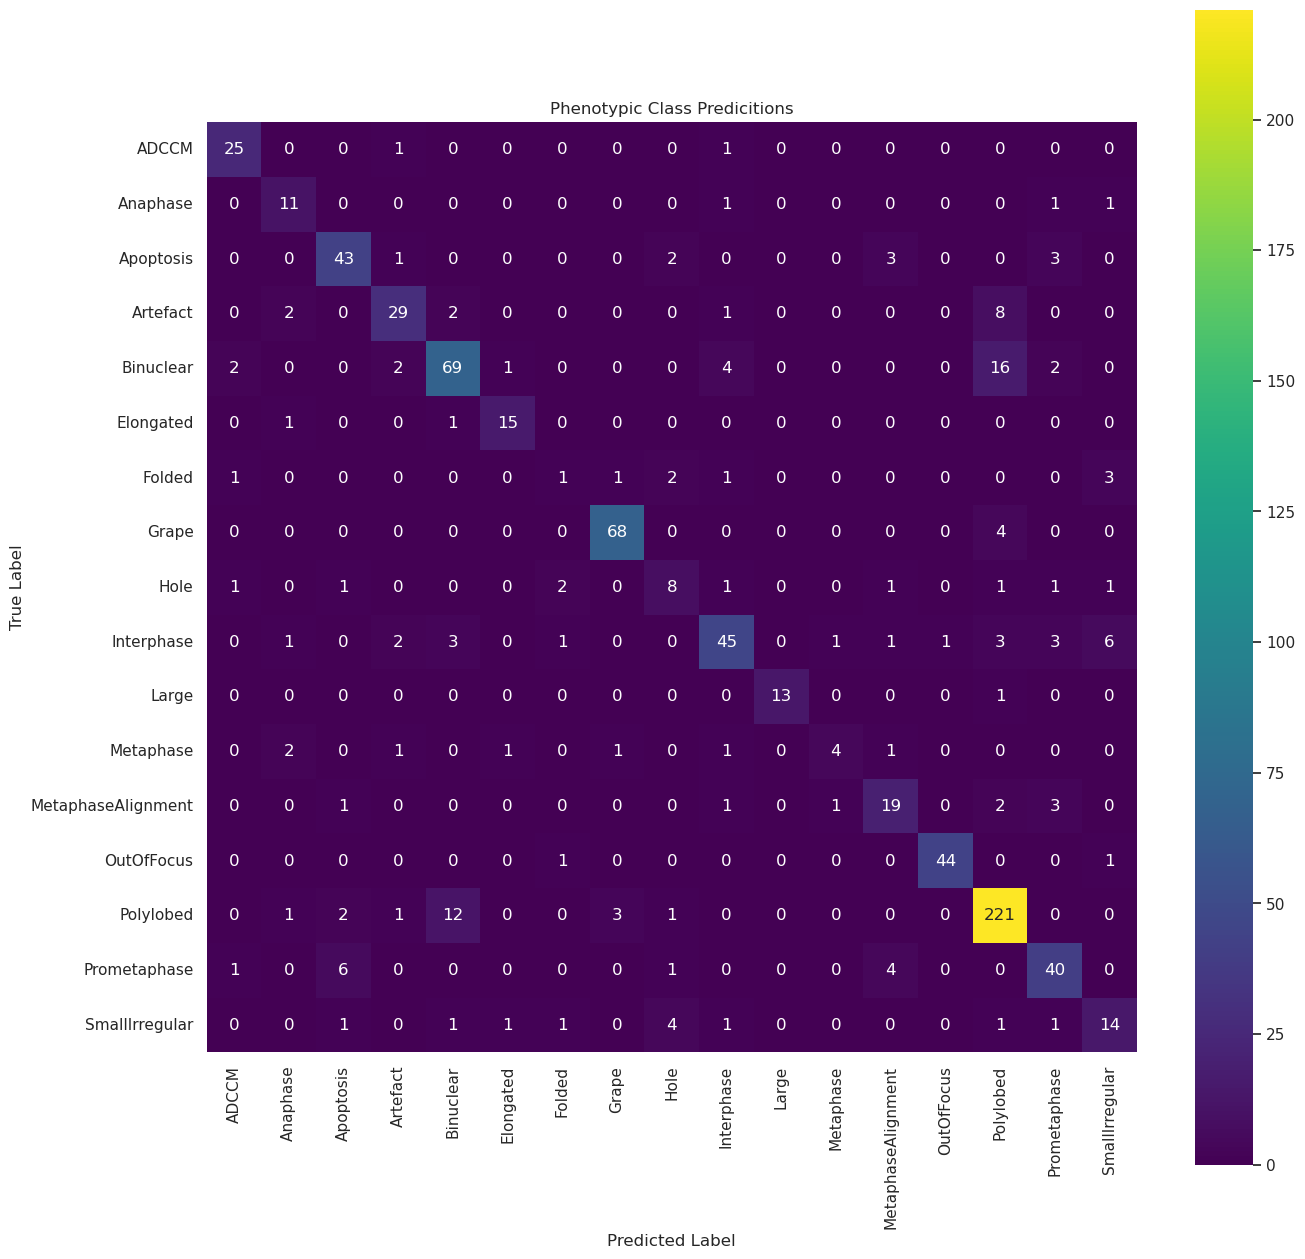

In [8]:
y_test, y_test_pred = evaluate_model_cm(log_reg_model, testing_data)

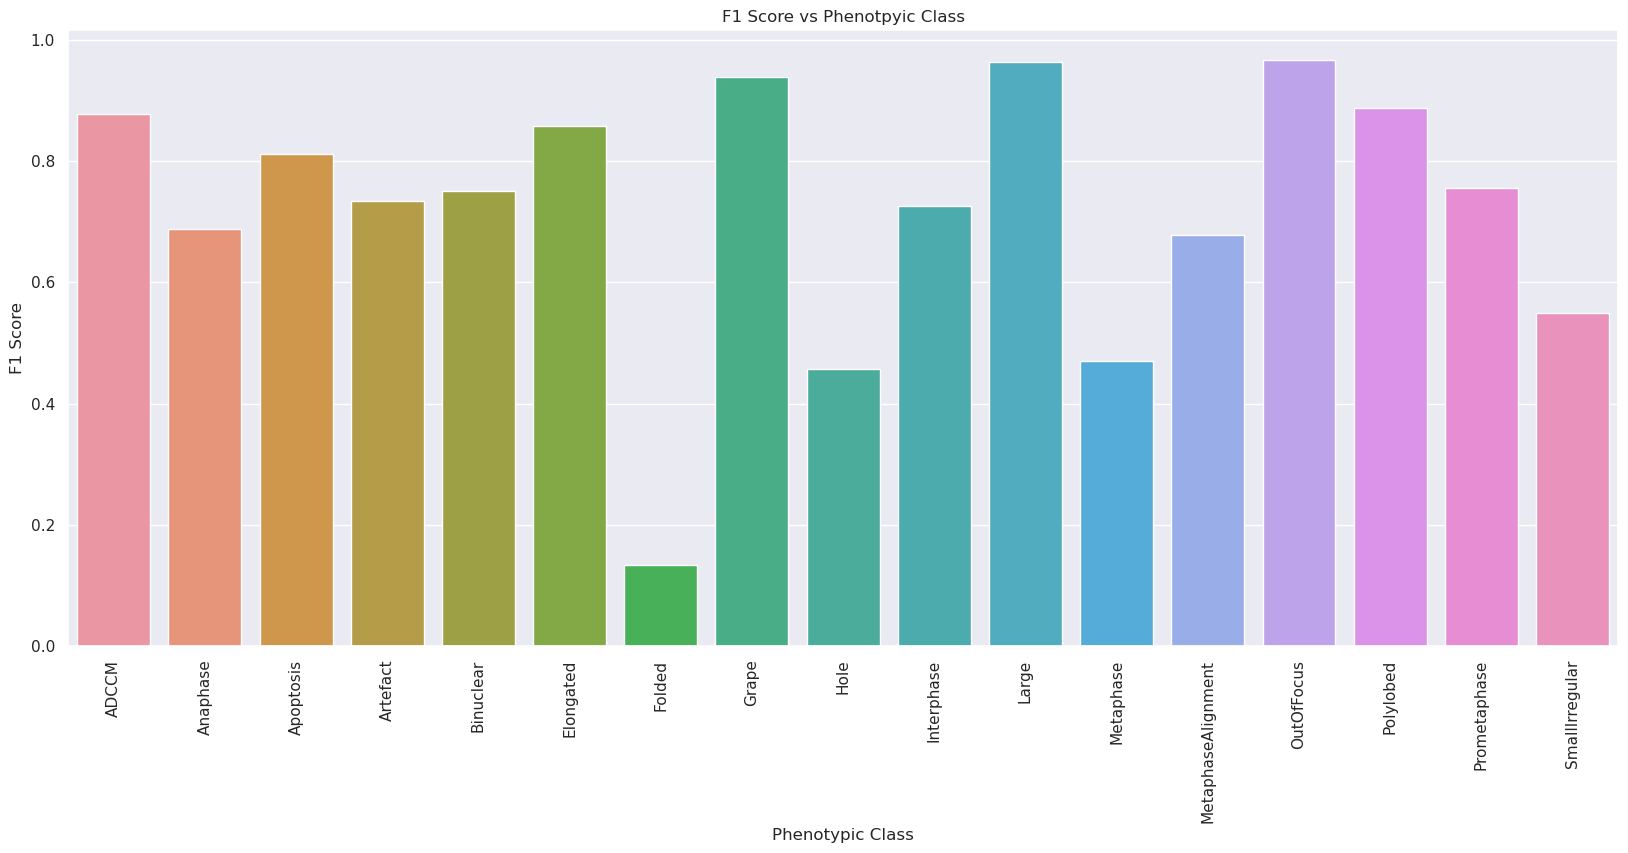

In [9]:
evaluate_model_score(log_reg_model, testing_data)

### Save trained model predicitions

In [10]:
predictions = []

predictions.append(y_train)
predictions.append(y_train_pred)

predictions.append(y_test)
predictions.append(y_test_pred)

predictions = pd.DataFrame(predictions)
predictions.index = ["y_train", "y_train_pred", "y_test", "y_test_pred"]
predictions.to_csv(f"{results_dir}/model_predictions.tsv", sep="\t")

### Evaluate shuffled baseline model

In [11]:
shuffled_baseline_log_reg_model_path = pathlib.Path(f"{model_dir}/shuffled_baseline_log_reg_model.joblib")
shuffled_baseline_log_reg_model = load(shuffled_baseline_log_reg_model_path) 

### Evaluate with training data

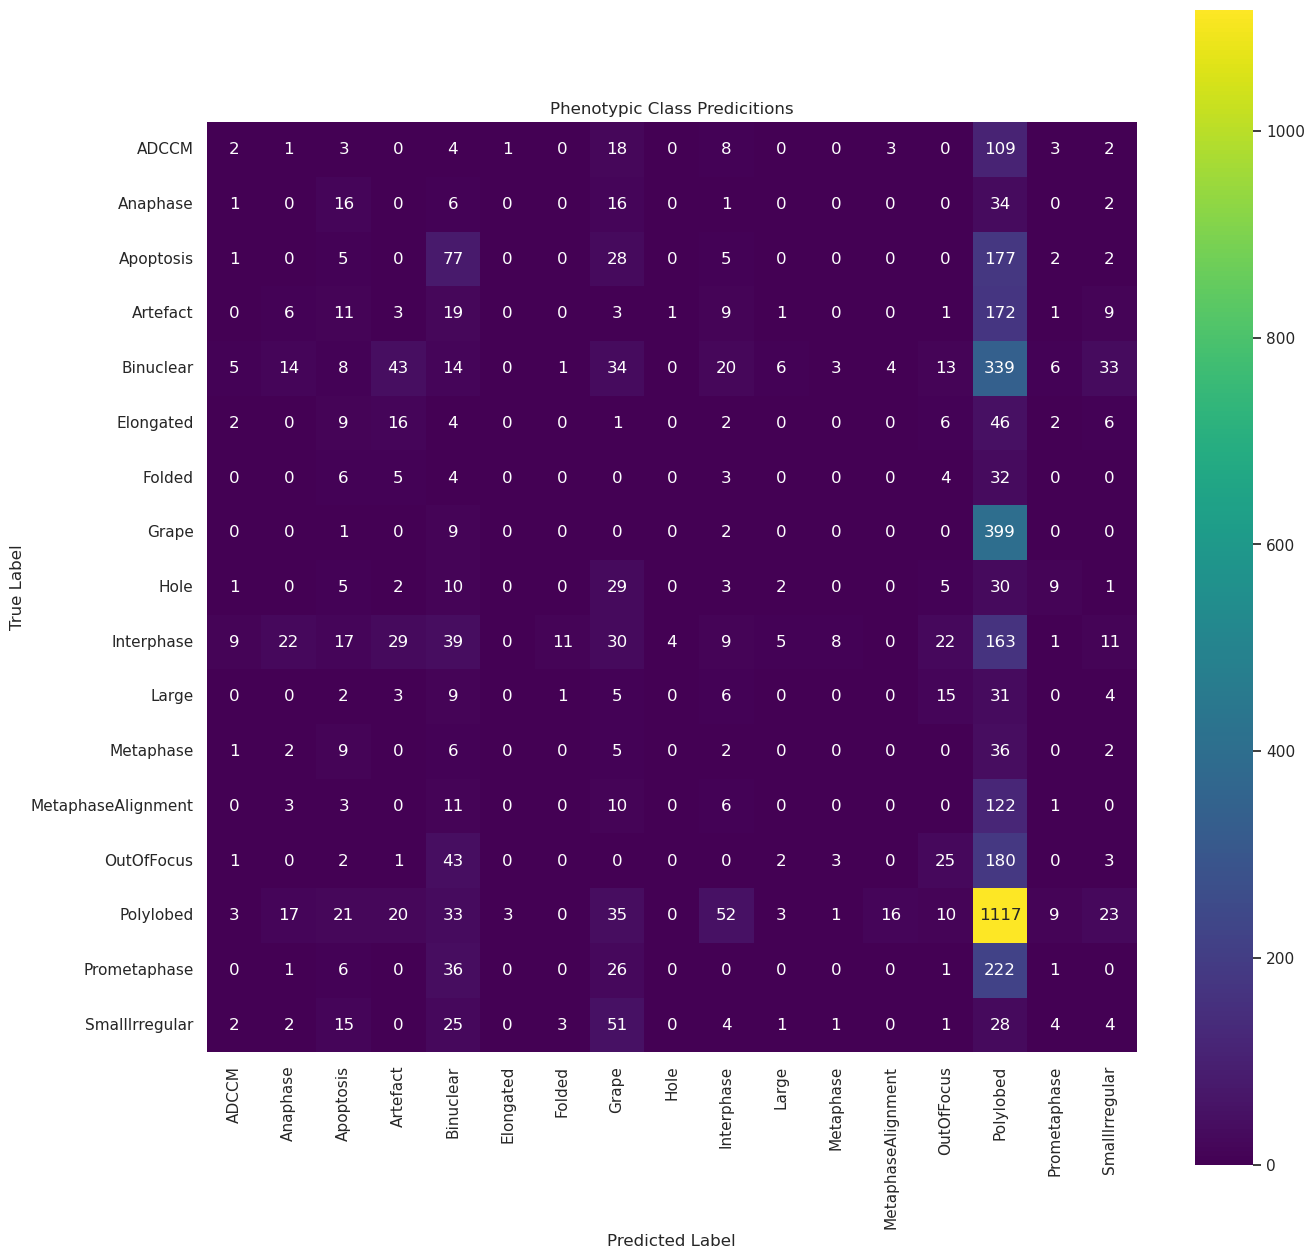

In [12]:
y_train, y_train_pred = evaluate_model_cm(shuffled_baseline_log_reg_model, training_data)

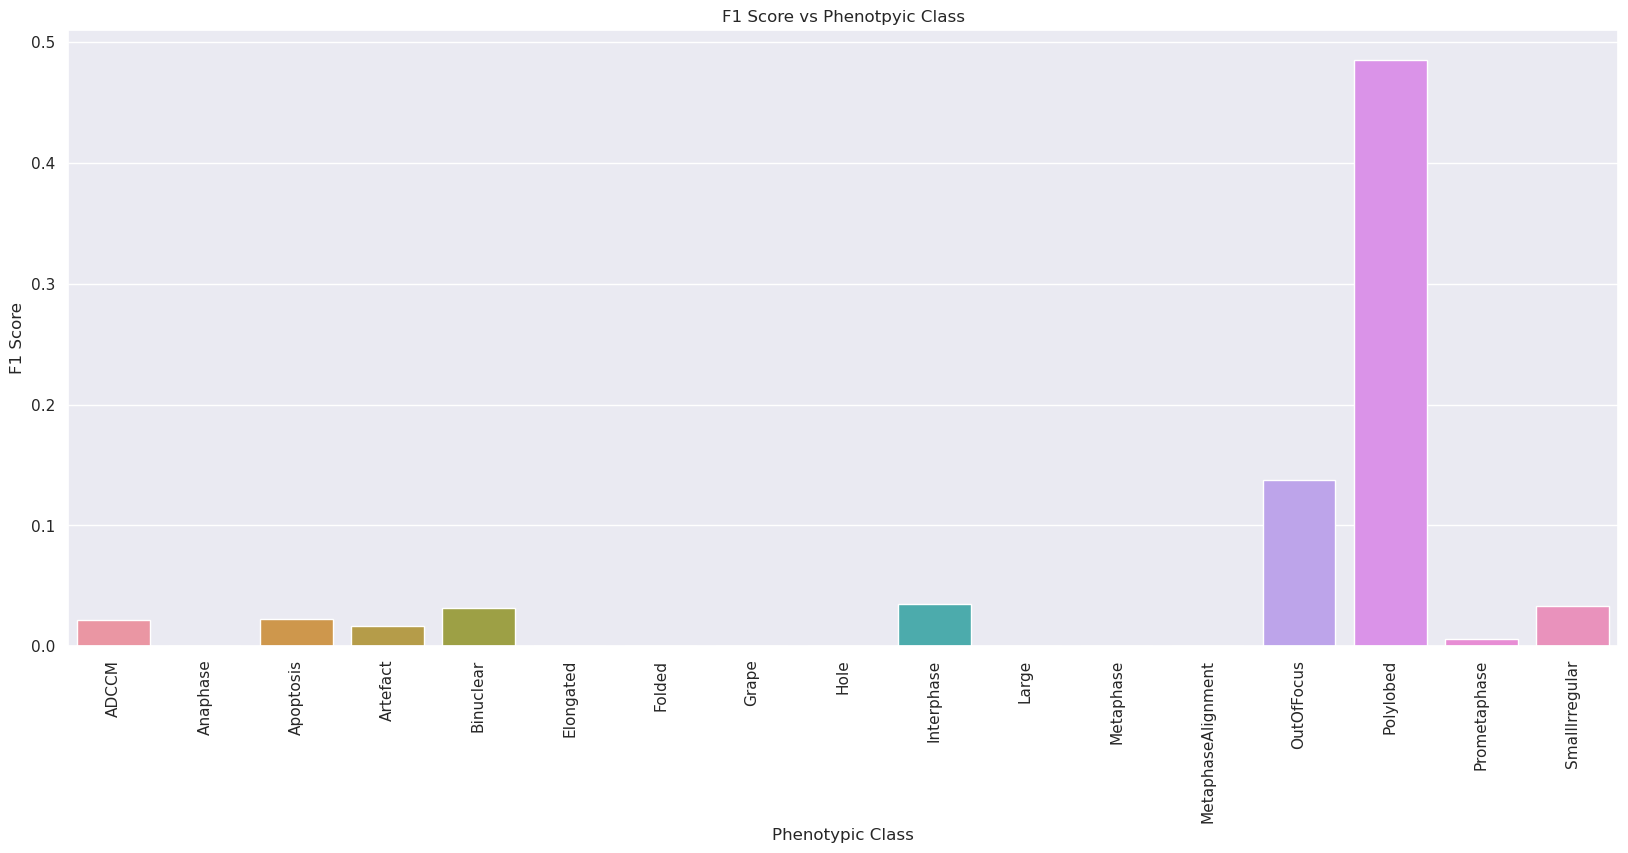

In [13]:
evaluate_model_score(shuffled_baseline_log_reg_model, training_data)

### Evaluate with testing data

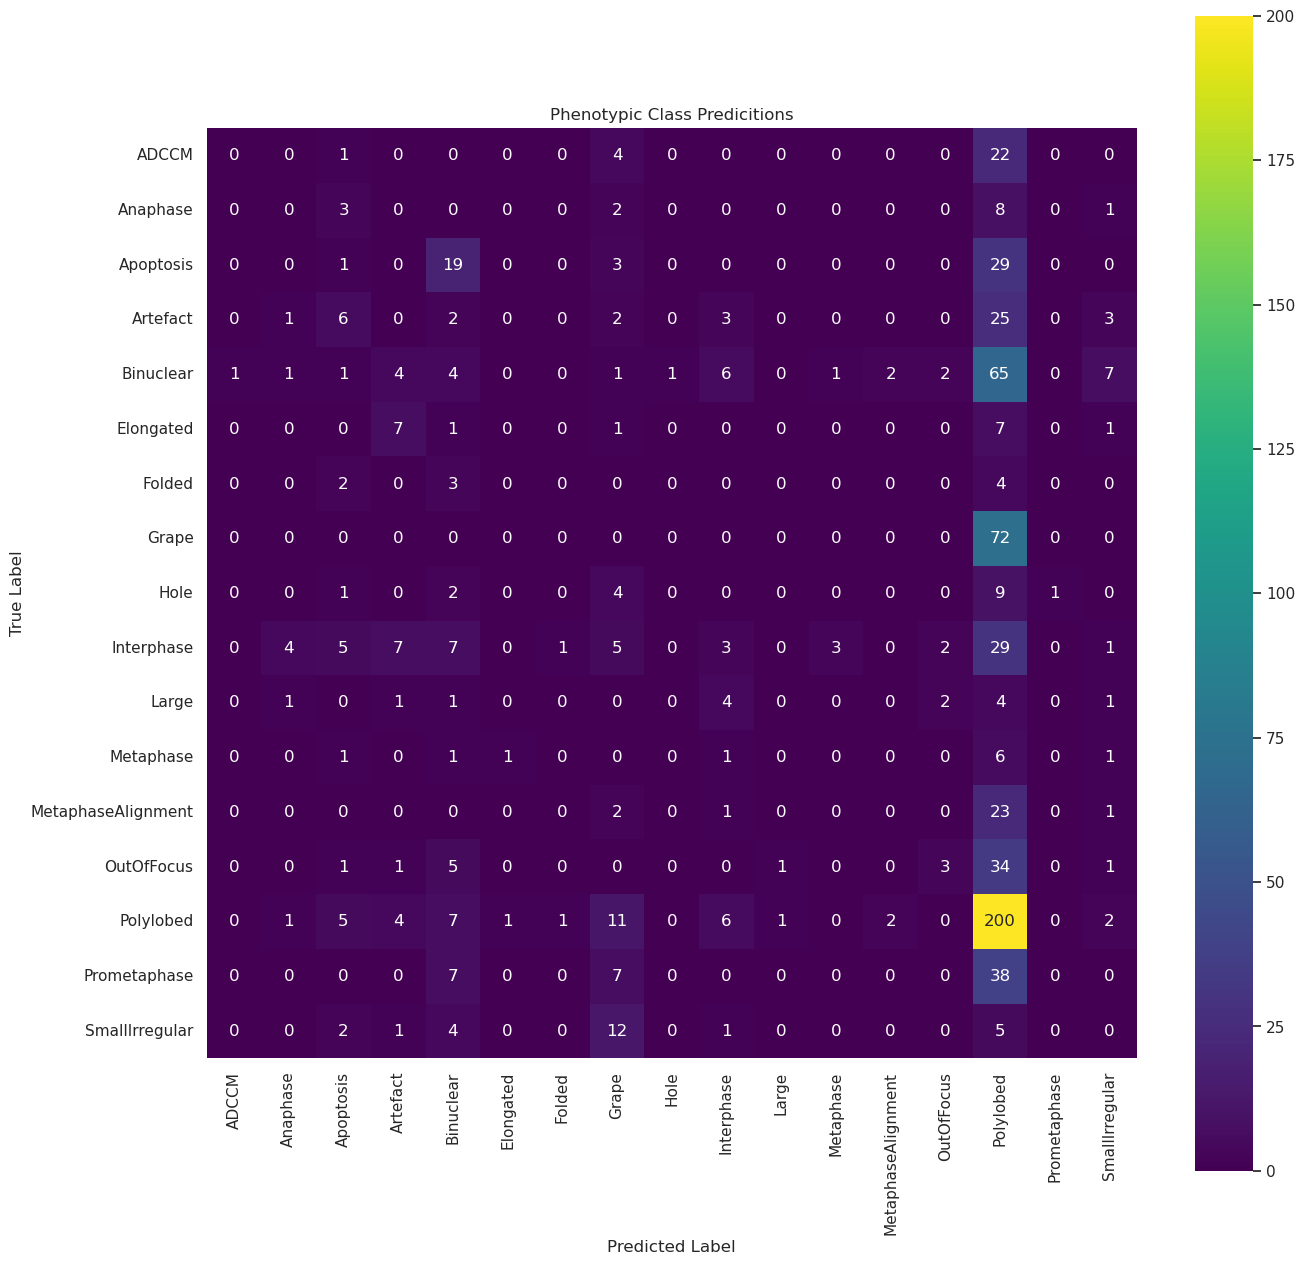

In [14]:
y_test, y_test_pred = evaluate_model_cm(shuffled_baseline_log_reg_model, testing_data)

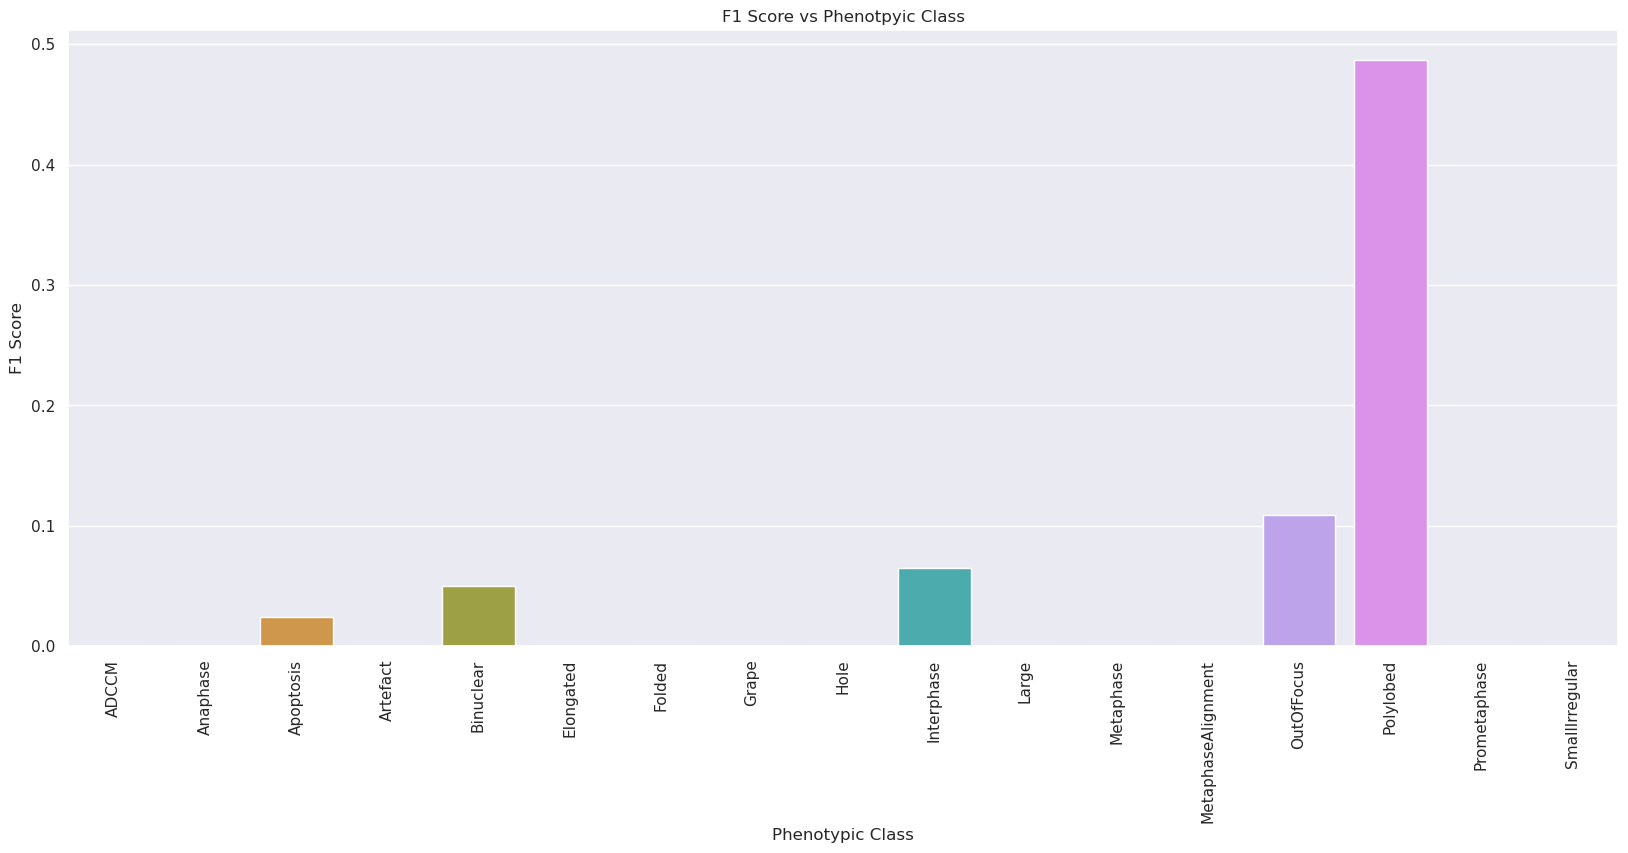

In [15]:
evaluate_model_score(shuffled_baseline_log_reg_model, testing_data)

### Save trained model predicitions

In [16]:
predictions = []

predictions.append(y_train)
predictions.append(y_train_pred)

predictions.append(y_test)
predictions.append(y_test_pred)

predictions = pd.DataFrame(predictions)
predictions.index = ["y_train", "y_train_pred", "y_test", "y_test_pred"]
predictions.to_csv(f"{results_dir}/shuffled_baseline_model_predictions.tsv", sep="\t")